In [49]:
import pandas as pd
import json
import numpy as np
from villes import Ville
from collections import Counter
import matplotlib.pyplot as plt

In [51]:
postes_df = pd.read_csv('config/postes_refactor.csv')
postes_df.head()

,Ville,Postes,Couleur
0,AGEN,2,noir
1,AIX-EN-PROVENCE,1,noir
2,AJACCIO,1,noir
3,ALBERTVILLE,1,vert
4,ALBI,2,vert


In [9]:
# df.to_csv('config/postes_refactor.csv', index=False)

In [10]:
params_dict = {'Voeux max': 6, 'Noires max': 2, 'Noires ou rouges max': 4, 'Vertes min': 0}

In [11]:
with open('config/parametres_refactor.json', 'w') as fp:
    json.dump(params_dict, fp)

In [2]:
sond_df = pd.read_csv('config/sondage_refactor.csv')
sond_df.head()

,id_auditeur,v_1,v_2,v_3,v_4,v_5,v_6
0,1,ARRAS,SAINT-QUENTIN,BEAUVAIS,COMPIEGNE,BETHUNE,BOULOGNE-SUR-MER
1,2,CHALON-SUR-SAONE,MONTBELIARD,LONS-LE-SAUNIER,COLMAR,CHALONS-EN-CHAMPAGNE,VESOUL
2,3,BASTIA,BAYONNE,BEZIERS,SAINT-NAZAIRE,PERPIGNAN,DUNKERQUE
3,4,BOBIGNY,CRETEIL,PONTOISE,EVRY,BEAUVAIS,NANCY
4,5,MARSEILLE,LYON,TOULOUSE,CHARTRES,PAU,CLERMONT-FERRAND


In [13]:
# sond_df.to_csv('config/sondage_refactor.csv', index=False)
sond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_auditeur  303 non-null    int64 
 1   v_1          303 non-null    object
 2   v_2          303 non-null    object
 3   v_3          303 non-null    object
 4   v_4          303 non-null    object
 5   v_5          303 non-null    object
 6   v_6          303 non-null    object
dtypes: int64(1), object(6)
memory usage: 16.7+ KB


In [23]:
sond2 = sond_df.copy()
sond2.set_index('id_auditeur', inplace=True)
sond2.loc[3, [f'v_{i}' for i in range(4, sond2.shape[1]+1)]] = np.nan
sond2.head()
# sond2.reset_index(inplace=True)
sond3_df = sond2.sample(frac=1, random_state = 42).reset_index()

In [13]:
sond3_df.iloc[0, 6] = np.nan
sond3_df.head()

,id_auditeur,v_1,v_2,v_3,v_4,v_5,v_6
0,180,LILLE,LE HAVRE,STRASBOURG,PARIS,NANCY,NaN
1,229,MARSEILLE,AIX-EN-PROVENCE,MONTPELLIER,TOULOUSE,PERPIGNAN,PAU
2,112,CRETEIL,MARSEILLE,TOULOUSE,LYON,NANCY,BEAUVAIS
3,247,PARIS,LILLE,STRASBOURG,TOULOUSE,SAINT-NAZAIRE,BOULOGNE-SUR-MER
4,61,BREST,LORIENT,QUIMPER,SAINT-NAZAIRE,CLERMONT-FERRAND,BAYONNE


In [19]:
sond3_df.loc[0, 'id_auditeur']

np.int64(180)

In [38]:
sond2['assignation'] = ''
sond2['voeu_realise'] = np.nan
sond2.loc[2, 'assignation'] = 'PARIS'
sond2.head()

,v_1,v_2,v_3,v_4,v_5,v_6,assignation,voeu_realise
id_auditeur,,,,,,,,
1,ARRAS,SAINT-QUENTIN,BEAUVAIS,COMPIEGNE,BETHUNE,BOULOGNE-SUR-MER,,NaN
2,CHALON-SUR-SAONE,MONTBELIARD,LONS-LE-SAUNIER,COLMAR,CHALONS-EN-CHAMPAGNE,VESOUL,PARIS,NaN
3,BASTIA,BAYONNE,BEZIERS,NaN,NaN,NaN,,NaN
4,BOBIGNY,CRETEIL,PONTOISE,EVRY,BEAUVAIS,NANCY,,NaN
5,MARSEILLE,LYON,TOULOUSE,CHARTRES,PAU,CLERMONT-FERRAND,,NaN


In [47]:
test = sond2.loc[3][:-2].values
np.where(test == 'PARIS')[0]

array([], dtype=int64)

In [17]:
for index, row in sond3_df.head().iterrows():
    aud = row['id_auditeur']
    print(len(row[1:].dropna()))

5
6
6
6
6


In [36]:
dict(Counter(sond2['v_3'].dropna().values))

{'BEAUVAIS': 2,
 'LONS-LE-SAUNIER': 3,
 'BEZIERS': 3,
 'PONTOISE': 16,
 'TOULOUSE': 7,
 'PERIGUEUX': 4,
 'SENLIS': 1,
 'MARSEILLE': 9,
 'ROUEN': 9,
 'TOULON': 7,
 'BOBIGNY': 3,
 'CLERMONT-FERRAND': 2,
 'DIJON': 4,
 'COLMAR': 4,
 'LE HAVRE': 4,
 'CHALON-SUR-SAONE': 2,
 'DRAGUIGNAN': 4,
 'MULHOUSE': 4,
 'MEAUX': 3,
 'ARRAS': 2,
 'EVRY': 8,
 'REIMS': 3,
 'CARPENTRAS': 4,
 'SAINTES': 5,
 'STRASBOURG': 4,
 'NANCY': 5,
 'CHARTRES': 2,
 'AGEN': 2,
 'PAU': 5,
 'VESOUL': 1,
 'LILLE': 12,
 'AVIGNON': 4,
 'SAINT-MALO': 1,
 'BAYONNE': 2,
 'SAINT-NAZAIRE': 1,
 'CHALONS-EN-CHAMPAGNE': 3,
 'ARGENTAN': 1,
 'NIMES': 4,
 'ANNECY': 1,
 'RENNES': 7,
 'AMIENS': 4,
 'BASTIA': 2,
 'METZ': 4,
 'POITIERS': 10,
 'QUIMPER': 1,
 'AIX-EN-PROVENCE': 6,
 'MONT-DE-MARSAN': 1,
 'THONON-LES-BAINS': 1,
 'CRETEIL': 4,
 'BREST': 3,
 'LE MANS': 6,
 'GRENOBLE': 3,
 'BOURG-EN-BRESSE': 4,
 'GAP': 1,
 'DUNKERQUE': 3,
 'LYON': 6,
 'NICE': 7,
 'PERPIGNAN': 4,
 'SARREGUEMINES': 2,
 'VALENCE': 2,
 'SAINT-ETIENNE': 5,
 'TARASCON': 

In [62]:
cas_part_df = pd.read_csv('config/cas_particuliers.csv')
cas_part_df.head()

,id_auditeur,v_max
0,1,6
1,2,6
2,3,6
3,4,6
4,5,6


In [63]:
cas_part_df.loc[cas_part_df['id_auditeur'] == 3, 'v_max'] = 10
cas_part_df.head()

,id_auditeur,v_max
0,1,6
1,2,6
2,3,10
3,4,6
4,5,6


In [64]:
cas_part_df[['id_auditeur', 'v_max']].sum(axis=1)

0        7
1        8
2       13
3       10
4       11
      ... 
298    305
299    306
300    307
301    308
302    309
Length: 303, dtype: int64

In [16]:
# cas_part_df.to_csv('config/cas_part.csv', index=False)

In [55]:
res = pd.read_csv('resultats.csv')
res.head()

,id_auditeur,v_1,v_2,v_3,v_4,v_5,v_6,assignation,voeu_realise
0,1,ARRAS,SAINT-QUENTIN,BEAUVAIS,COMPIEGNE,BETHUNE,BOULOGNE-SUR-MER,SAINT-QUENTIN,2
1,2,CHALON-SUR-SAONE,MONTBELIARD,LONS-LE-SAUNIER,COLMAR,CHALONS-EN-CHAMPAGNE,VESOUL,CHALON-SUR-SAONE,1
2,3,BASTIA,BAYONNE,BEZIERS,SAINT-NAZAIRE,PERPIGNAN,DUNKERQUE,BEZIERS,3
3,4,BOBIGNY,CRETEIL,PONTOISE,EVRY,BEAUVAIS,NANCY,BOBIGNY,1
4,5,MARSEILLE,LYON,TOULOUSE,CHARTRES,PAU,CLERMONT-FERRAND,CHARTRES,4


<Axes: ylabel='count'>

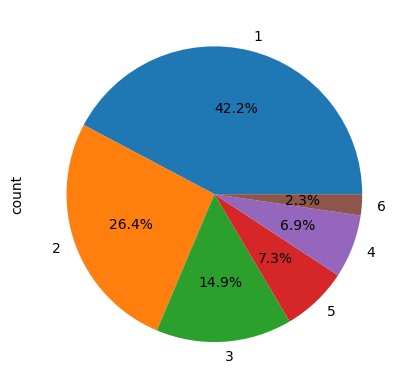

In [60]:
res = pd.read_csv('resultats/resultats.csv')
res['voeu_realise'].value_counts().plot.pie(autopct='%1.1f%%')

In [66]:
dis = pd.read_csv('resultats/distribution_voeux.csv')
dis.head()

,Ville,Postes,Couleur,nombre_voeux_1,nombre_voeux_2,nombre_voeux_3,nombre_voeux_4,nombre_voeux_5,nombre_voeux_6,nombre_voeux_7,total_demandes
0,AGEN,2,noir,1.0,6.0,2.0,1.0,NaN,NaN,NaN,10.0
1,AIX-EN-PROVENCE,1,noir,2.0,5.0,6.0,1.0,NaN,NaN,NaN,14.0
2,AJACCIO,1,noir,3.0,2.0,NaN,1.0,NaN,NaN,NaN,6.0
3,ALBERTVILLE,1,vert,NaN,NaN,NaN,1.0,NaN,3.0,NaN,4.0
4,ALBI,2,vert,2.0,NaN,NaN,2.0,2.0,3.0,NaN,9.0


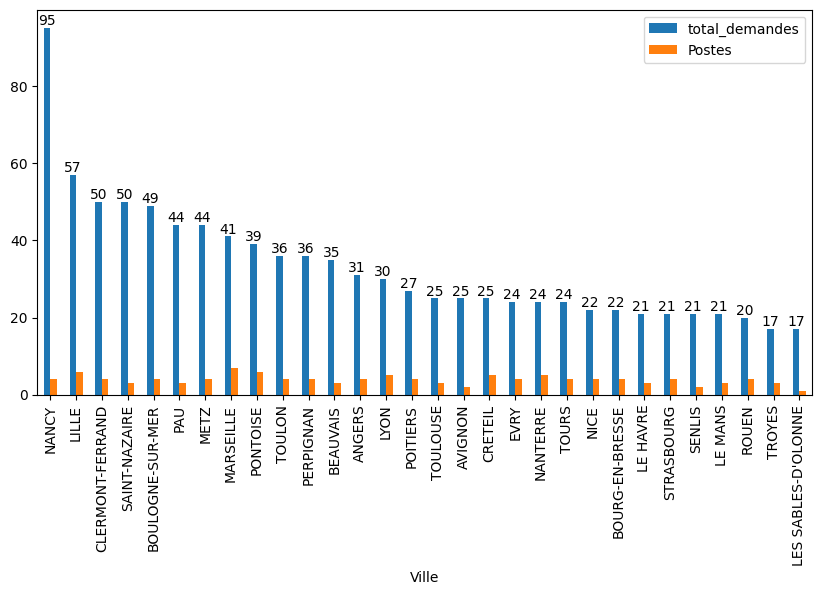

In [74]:
ax = dis.sort_values(by='total_demandes', ascending=False).set_index('Ville').head(30)[['total_demandes', 'Postes']].plot.bar(figsize=(10,5))
ax.bar_label(ax.containers[0])
plt.show()

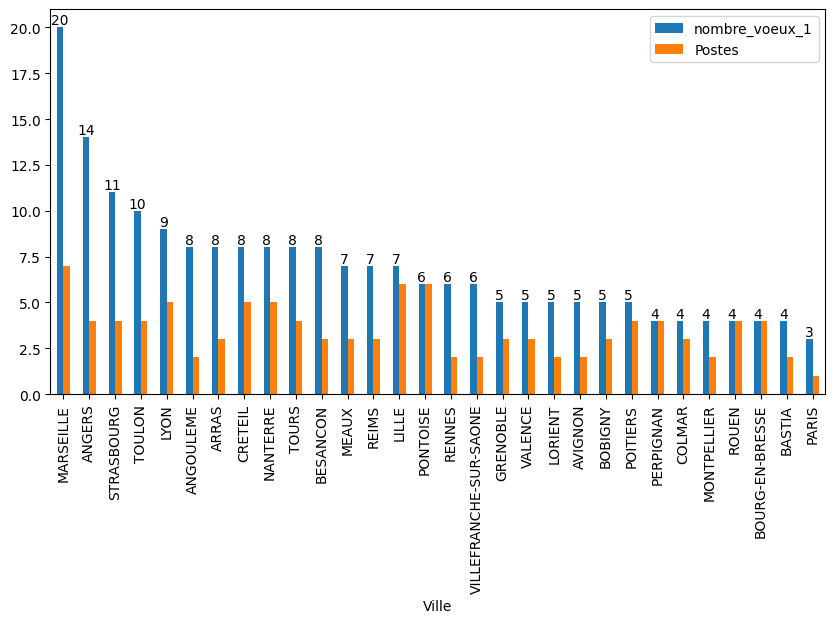

In [76]:
ax = dis.sort_values(by='nombre_voeux_1', ascending=False).set_index('Ville').head(30)[['nombre_voeux_1', 'Postes']].plot.bar(figsize=(10,5))
ax.bar_label(ax.containers[0])
plt.show()